# Machine Learning Engineer Nanodegree
## Reinforcement Learning
## Project: Train a Smartcab to Drive

Welcome to the fourth project of the Machine Learning Engineer Nanodegree! In this notebook, template code has already been provided for you to aid in your analysis of the *Smartcab* and your implemented learning algorithm. You will not need to modify the included code beyond what is requested. There will be questions that you must answer which relate to the project and the visualizations provided in the notebook. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide in `agent.py`.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

-----

## Getting Started
In this project, you will work towards constructing an optimized Q-Learning driving agent that will navigate a *Smartcab* through its environment towards a goal. Since the *Smartcab* is expected to drive passengers from one location to another, the driving agent will be evaluated on two very important metrics: **Safety** and **Reliability**. A driving agent that gets the *Smartcab* to its destination while running red lights or narrowly avoiding accidents would be considered **unsafe**. Similarly, a driving agent that frequently fails to reach the destination in time would be considered **unreliable**. Maximizing the driving agent's **safety** and **reliability** would ensure that *Smartcabs* have a permanent place in the transportation industry.

**Safety** and **Reliability** are measured using a letter-grade system as follows:

| Grade 	| Safety 	| Reliability 	|
|:-----:	|:------:	|:-----------:	|
|   A+  	|  Agent commits no traffic violations,<br/>and always chooses the correct action. | Agent reaches the destination in time<br />for 100% of trips. |
|   A   	|  Agent commits few minor traffic violations,<br/>such as failing to move on a green light. | Agent reaches the destination on time<br />for at least 90% of trips. |
|   B   	| Agent commits frequent minor traffic violations,<br/>such as failing to move on a green light. | Agent reaches the destination on time<br />for at least 80% of trips. |
|   C   	|  Agent commits at least one major traffic violation,<br/> such as driving through a red light. | Agent reaches the destination on time<br />for at least 70% of trips. |
|   D   	| Agent causes at least one minor accident,<br/> such as turning left on green with oncoming traffic.       	| Agent reaches the destination on time<br />for at least 60% of trips. |
|   F   	|  Agent causes at least one major accident,<br />such as driving through a red light with cross-traffic.      	| Agent fails to reach the destination on time<br />for at least 60% of trips. |

To assist evaluating these important metrics, you will need to load visualization code that will be used later on in the project. Run the code cell below to import this code which is required for your analysis.

In [6]:
# Import the visualization code
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

### Understand the World
Before starting to work on implementing your driving agent, it's necessary to first understand the world (environment) which the *Smartcab* and driving agent work in. One of the major components to building a self-learning agent is understanding the characteristics about the agent, which includes how the agent operates. To begin, simply run the `agent.py` agent code exactly how it is -- no need to make any additions whatsoever. Let the resulting simulation run for some time to see the various working components. Note that in the visual simulation (if enabled), the **white vehicle** is the *Smartcab*.

### Question 1
In a few sentences, describe what you observe during the simulation when running the default `agent.py` agent code. Some things you could consider:
- *Does the Smartcab move at all during the simulation?*
- *What kind of rewards is the driving agent receiving?*
- *How does the light changing color affect the rewards?*  

**Hint:** From the `/smartcab/` top-level directory (where this notebook is located), run the command 
```bash
'python smartcab/agent.py'
```

**Answer:** I see an 8x8 grid of streets scattered with little colored cars constantly flickering about the screen. The agent sits at one intersection and does not move, regardless of whether the light turns 'green' or 'red'. If the agent is stopped at a red light, it gains a positive numeric reward (noted by bold green text in the upper right-hand-corner of the simulation). If the agent doesn't move during a green light, however, it is penalized (noted by bold red text). It is also interesting to note that the negative rewards appear to have a much greater absolute value than the positive rewards (i.e. stopping at a green light: -6.0 points vs. stopping at a red light: +2.0 points). 

**Review:** For most cases, the agent is penalized if it doesn't move at a 'green' light. The one exception to this rule is if the agent is attempting to make a 'left' turn, but there is oncoming traffic preventing it from safely doing so. In this case, the agent should be rewarded for stopping at a 'green' light.

### Understand the Code
In addition to understanding the world, it is also necessary to understand the code itself that governs how the world, simulation, and so on operate. Attempting to create a driving agent would be difficult without having at least explored the *"hidden"* devices that make everything work. In the `/smartcab/` top-level directory, there are two folders: `/logs/` (which will be used later) and `/smartcab/`. Open the `/smartcab/` folder and explore each Python file included, then answer the following question.

### Question 2
- *In the *`agent.py`* Python file, choose three flags that can be set and explain how they change the simulation.*
- *In the *`environment.py`* Python file, what Environment class function is called when an agent performs an action?*
- *In the *`simulator.py`* Python file, what is the difference between the *`'render_text()'`* function and the *`'render()'`* function?*
- *In the *`planner.py`* Python file, will the *`'next_waypoint()`* function consider the North-South or East-West direction first?*

**Answer:**

There are several different flags that can be set, and all impact the simulation in various ways. Here are details of a few:
1. The **num_dummies** flag can be set to specify number of dummy agents driving around the environment. Dummy agents moves randomly on city grid and appear to be follow traffic rules.
2. The **update_delay** flag can be set to control the speed at which the simulation resets between trials. A smaller number means a shorter delay, making the simulation run faster.
3. If the **learning** flag is set to 'True', the agent will use Q-learning to navigate toward an optimal option-selection policy for its given state.

The **act()** function is called when an agent performs an action. This function takes an agent object and action value as arguments and returns a positive or negative reward based on agent's action.

The simulator class allows us to view the simulation in a dynamic animated environment. The **render()** function opens up a pygame visual environment graphical user interface, while the **render_text()** is used when choosing to output the simulation results in the command line.

**next_waypoint()** is a method of the **RoutePlanner** class and returns next optimal direction the agent should take to reach its target destination. It considers *East-West* first, followed by *North-South*.

-----
## Implement a Basic Driving Agent

The first step to creating an optimized Q-Learning driving agent is getting the agent to actually take valid actions. In this case, a valid action is one of `None`, (do nothing) `'Left'` (turn left), `'Right'` (turn right), or `'Forward'` (go forward). For your first implementation, navigate to the `'choose_action()'` agent function and make the driving agent randomly choose one of these actions. Note that you have access to several class variables that will help you write this functionality, such as `'self.learning'` and `'self.valid_actions'`. Once implemented, run the agent file and simulation briefly to confirm that your driving agent is taking a random action each time step.

### Basic Agent Simulation Results
To obtain results from the initial simulation, you will need to adjust following flags:
- `'enforce_deadline'` - Set this to `True` to force the driving agent to capture whether it reaches the destination in time.
- `'update_delay'` - Set this to a small value (such as `0.01`) to reduce the time between steps in each trial.
- `'log_metrics'` - Set this to `True` to log the simluation results as a `.csv` file in `/logs/`.
- `'n_test'` - Set this to `'10'` to perform 10 testing trials.

Optionally, you may disable to the visual simulation (which can make the trials go faster) by setting the `'display'` flag to `False`. Flags that have been set here should be returned to their default setting when debugging. It is important that you understand what each flag does and how it affects the simulation!

Once you have successfully completed the initial simulation (there should have been 20 training trials and 10 testing trials), run the code cell below to visualize the results. Note that log files are overwritten when identical simulations are run, so be careful with what log file is being loaded!


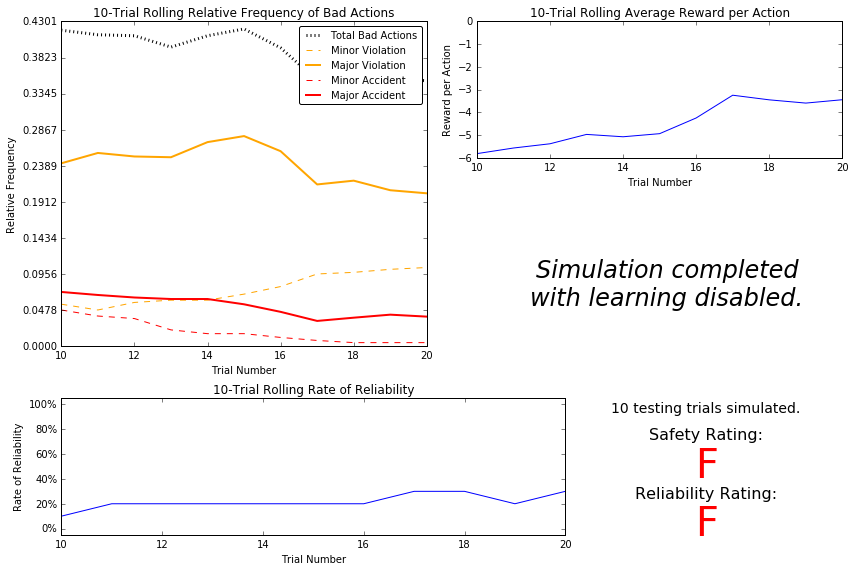

In [7]:
# Load the 'sim_no-learning' log file from the initial simulation results
vs.plot_trials('sim_no-learning.csv')

### Question 3
Using the visualization above that was produced from your initial simulation, provide an analysis and make several observations about the driving agent. Be sure that you are making at least one observation about each panel present in the visualization. Some things you could consider:
- *How frequently is the driving agent making bad decisions? How many of those bad decisions cause accidents?*
- *Given that the agent is driving randomly, does the rate of reliabilty make sense?*
- *What kind of rewards is the agent receiving for its actions? Do the rewards suggest it has been penalized heavily?*
- *As the number of trials increases, does the outcome of results change significantly?*
- *Would this Smartcab be considered safe and/or reliable for its passengers? Why or why not?*

**Answer:**

- The agent makes bad decisions around 40% of the time and causes some form of accident roughly 10% of the time.

- Considering the agent is driving randomly, it has a 1 in 4 (or 25%) chance of choosing the appropriate action. My log indicates a reliability of roughly 20%, which makes sense.

- The agent receives a negative average reward per action of roughly -5. This suggests a heavy penalization that reflect a high rate of bad decisions taken.

- Because the agent is not learning, one would not expect the reward-per-action to increase with time, because the likelihood of making a mistake stays consistent throughout the entire simulation, much like rolling a dice. In our situation, the reward per action does appear to increase slightly over time, but because of the random nature of the environment the average reward per action should stay level if it were extrapolated over additional trials. As expected given that the agent chooses actions uniformly at random, the rolling rate of reliability stays approximately constant at 20%.

- The only scenarios where this Smartcab could be considered safe would be if it were a contestant in a construction derby or if it was a car in the video game Grand Theft Auto. In real life, however, it is clearly unsafe and unreliable.


## Inform the Driving Agent
The second step to creating an optimized Q-learning driving agent is defining a set of states that the agent can occupy in the environment. Depending on the input, sensory data, and additional variables available to the driving agent, a set of states can be defined for the agent so that it can eventually *learn* what action it should take when occupying a state. The condition of `'if state then action'` for each state is called a **policy**, and is ultimately what the driving agent is expected to learn. Without defining states, the driving agent would never understand which action is most optimal -- or even what environmental variables and conditions it cares about!

### Identify States
Inspecting the `'build_state()'` agent function shows that the driving agent is given the following data from the environment:
- `'waypoint'`, which is the direction the *Smartcab* should drive leading to the destination, relative to the *Smartcab*'s heading.
- `'inputs'`, which is the sensor data from the *Smartcab*. It includes 
  - `'light'`, the color of the light.
  - `'left'`, the intended direction of travel for a vehicle to the *Smartcab*'s left. Returns `None` if no vehicle is present.
  - `'right'`, the intended direction of travel for a vehicle to the *Smartcab*'s right. Returns `None` if no vehicle is present.
  - `'oncoming'`, the intended direction of travel for a vehicle across the intersection from the *Smartcab*. Returns `None` if no vehicle is present.
- `'deadline'`, which is the number of actions remaining for the *Smartcab* to reach the destination before running out of time.

### Question 4
*Which features available to the agent are most relevant for learning both **safety** and **efficiency**? Why are these features appropriate for modeling the *Smartcab* in the environment? If you did not choose some features, why are those features* not *appropriate?*

**Answer:**

The **'waypoint'** feature is relevant for efficiency because it is necessary in order to define an efficient and optimal route to the destination. 

The **'light', 'left'** and **'oncoming'** features relate to safety because the agent requires this information so it can avoid violations and accidents. The **'right'** feature is not relevant because the agent should have the right-of-way and does not need to yield to traffic on the right.

The **'deadline'** feature can be seen to relate to efficiency, but it could also influence the agent to take an unsafe action because it is in a hurry. Regardless of what the **'deadline'** time is set to, the agent should still take the most efficient route established by the 'waypoint'. In addition, **'deadline'** also adds the risk of massively increasing the number of possible states, requiring a much longer training period. 

### Define a State Space
When defining a set of states that the agent can occupy, it is necessary to consider the *size* of the state space. That is to say, if you expect the driving agent to learn a **policy** for each state, you would need to have an optimal action for *every* state the agent can occupy. If the number of all possible states is very large, it might be the case that the driving agent never learns what to do in some states, which can lead to uninformed decisions. For example, consider a case where the following features are used to define the state of the *Smartcab*:

`('is_raining', 'is_foggy', 'is_red_light', 'turn_left', 'no_traffic', 'previous_turn_left', 'time_of_day')`.

How frequently would the agent occupy a state like `(False, True, True, True, False, False, '3AM')`? Without a near-infinite amount of time for training, it's doubtful the agent would ever learn the proper action!

### Question 5
*If a state is defined using the features you've selected from **Question 4**, what would be the size of the state space? Given what you know about the evironment and how it is simulated, do you think the driving agent could learn a policy for each possible state within a reasonable number of training trials?*  
**Hint:** Consider the *combinations* of features to calculate the total number of states!

**Answer:**
After removing **'deadline'** and **'right'**, our state space consists of 4 features:  **'waypoint'**, **'light'**, **'left'**, and **'oncoming'**. **'waypoint'** has 3 different options, **'light'** has 2 options, and **'left'** and **'oncoming'** each have 4 options. This results in 96 total possible combinations (3x2x4x4 = 96). 96 seems like a reasonable number of policies the agent can learn. The number of trials will need to be increased to meet the Q-Learning requirements, which states that each state-action pair must be "visited infinitely" for convergence, but by limiting the total possible combinations to 96 (when it could have easily been in the thousands if we included **'deadline'** and **'right'**) should allow us to make a confident analysis in a reasonable number of training trials.

### Update the Driving Agent State
For your second implementation, navigate to the `'build_state()'` agent function. With the justification you've provided in **Question 4**, you will now set the `'state'` variable to a tuple of all the features necessary for Q-Learning. Confirm your driving agent is updating its state by running the agent file and simulation briefly and note whether the state is displaying. If the visual simulation is used, confirm that the updated state corresponds with what is seen in the simulation.

**Note:** Remember to reset simulation flags to their default setting when making this observation!

-----
## Implement a Q-Learning Driving Agent
The third step to creating an optimized Q-Learning agent is to begin implementing the functionality of Q-Learning itself. The concept of Q-Learning is fairly straightforward: For every state the agent visits, create an entry in the Q-table for all state-action pairs available. Then, when the agent encounters a state and performs an action, update the Q-value associated with that state-action pair based on the reward received and the interative update rule implemented. Of course, additional benefits come from Q-Learning, such that we can have the agent choose the *best* action for each state based on the Q-values of each state-action pair possible. For this project, you will be implementing a *decaying,* $\epsilon$*-greedy* Q-learning algorithm with *no* discount factor. Follow the implementation instructions under each **TODO** in the agent functions.

Note that the agent attribute `self.Q` is a dictionary: This is how the Q-table will be formed. Each state will be a key of the `self.Q` dictionary, and each value will then be another dictionary that holds the *action* and *Q-value*. Here is an example:

```
{ 'state-1': { 
    'action-1' : Qvalue-1,
    'action-2' : Qvalue-2,
     ...
   },
  'state-2': {
    'action-1' : Qvalue-1,
     ...
   },
   ...
}
```

Furthermore, note that you are expected to use a *decaying* $\epsilon$ *(exploration) factor*. Hence, as the number of trials increases, $\epsilon$ should decrease towards 0. This is because the agent is expected to learn from its behavior and begin acting on its learned behavior. Additionally, The agent will be tested on what it has learned after $\epsilon$ has passed a certain threshold (the default threshold is 0.01). For the initial Q-Learning implementation, you will be implementing a linear decaying function for $\epsilon$.

### Q-Learning Simulation Results
To obtain results from the initial Q-Learning implementation, you will need to adjust the following flags and setup:
- `'enforce_deadline'` - Set this to `True` to force the driving agent to capture whether it reaches the destination in time.
- `'update_delay'` - Set this to a small value (such as `0.01`) to reduce the time between steps in each trial.
- `'log_metrics'` - Set this to `True` to log the simluation results as a `.csv` file and the Q-table as a `.txt` file in `/logs/`.
- `'n_test'` - Set this to `'10'` to perform 10 testing trials.
- `'learning'` - Set this to `'True'` to tell the driving agent to use your Q-Learning implementation.

In addition, use the following decay function for $\epsilon$:

$$ \epsilon_{t+1} = \epsilon_{t} - 0.05, \hspace{10px}\textrm{for trial number } t$$

If you have difficulty getting your implementation to work, try setting the `'verbose'` flag to `True` to help debug. Flags that have been set here should be returned to their default setting when debugging. It is important that you understand what each flag does and how it affects the simulation! 

Once you have successfully completed the initial Q-Learning simulation, run the code cell below to visualize the results. Note that log files are overwritten when identical simulations are run, so be careful with what log file is being loaded!

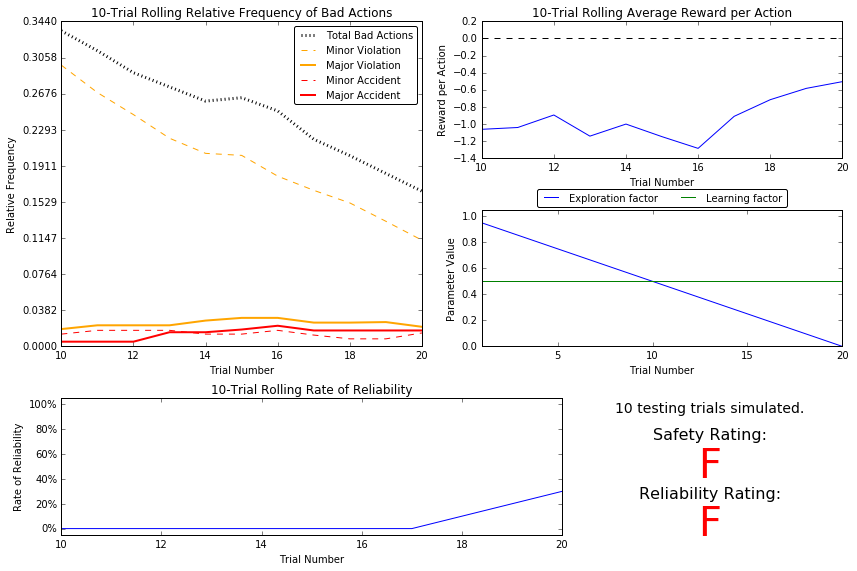

In [15]:
# Load the 'sim_default-learning' file from the default Q-Learning simulation
vs.plot_trials('sim_default-learning.csv')

### Question 6
Using the visualization above that was produced from your default Q-Learning simulation, provide an analysis and make observations about the driving agent like in **Question 3**. Note that the simulation should have also produced the Q-table in a text file which can help you make observations about the agent's learning. Some additional things you could consider:  
- *Are there any observations that are similar between the basic driving agent and the default Q-Learning agent?*
- *Approximately how many training trials did the driving agent require before testing? Does that number make sense given the epsilon-tolerance?*
- *Is the decaying function you implemented for $\epsilon$ (the exploration factor) accurately represented in the parameters panel?*
- *As the number of training trials increased, did the number of bad actions decrease? Did the average reward increase?*
- *How does the safety and reliability rating compare to the initial driving agent?*

**Answer:**

- The agent's total bad decision rate decreases over time to reach a final value of roughly 17%. The frequency of accidents is now about 4-5% of the time - less than half the amount of accidents as before. The rate of reliability remained at 0%, but jumped to roughly 30% by the last trial. Although it is still negative, the average reward significantly improved from an average of -5.0 to an average of -1.0, and is inching closer toward 0. This can be attributed to lower rates of bad decisions. 

- Because we implemented a linear decay of the exploration factor **($\epsilon$ - .05)**, the driving agent required 20 training trials before testing. Our initial exploration factor was 1.0 and decayed -0.05 every step per trial allowing the agent to cover a full probability distribution in 20 steps.

- The decaying function that was implemented is appropriate because we want our agent to randomly explore states that are not initially optimal in order to avoid getting stuck in local optima. In the parameters panel, we see $\epsilon$ represented by a linearly decreasing line which is the expected behavior of our decaying function.

- Our agent is still nowhere close to being considered "safe" or "reliable", but it isn't witnessing nearly as many major violations or accidents as previously seen.

-----
## Improve the Q-Learning Driving Agent
The third step to creating an optimized Q-Learning agent is to perform the optimization! Now that the Q-Learning algorithm is implemented and the driving agent is successfully learning, it's necessary to tune settings and adjust learning paramaters so the driving agent learns both **safety** and **efficiency**. Typically this step will require a lot of trial and error, as some settings will invariably make the learning worse. One thing to keep in mind is the act of learning itself and the time that this takes: In theory, we could allow the agent to learn for an incredibly long amount of time; however, another goal of Q-Learning is to *transition from experimenting with unlearned behavior to acting on learned behavior*. For example, always allowing the agent to perform a random action during training (if $\epsilon = 1$ and never decays) will certainly make it *learn*, but never let it *act*. When improving on your Q-Learning implementation, consider the impliciations it creates and whether it is logistically sensible to make a particular adjustment.

### Improved Q-Learning Simulation Results
To obtain results from the initial Q-Learning implementation, you will need to adjust the following flags and setup:
- `'enforce_deadline'` - Set this to `True` to force the driving agent to capture whether it reaches the destination in time.
- `'update_delay'` - Set this to a small value (such as `0.01`) to reduce the time between steps in each trial.
- `'log_metrics'` - Set this to `True` to log the simluation results as a `.csv` file and the Q-table as a `.txt` file in `/logs/`.
- `'learning'` - Set this to `'True'` to tell the driving agent to use your Q-Learning implementation.
- `'optimized'` - Set this to `'True'` to tell the driving agent you are performing an optimized version of the Q-Learning implementation.

Additional flags that can be adjusted as part of optimizing the Q-Learning agent:
- `'n_test'` - Set this to some positive number (previously 10) to perform that many testing trials.
- `'alpha'` - Set this to a real number between 0 - 1 to adjust the learning rate of the Q-Learning algorithm.
- `'epsilon'` - Set this to a real number between 0 - 1 to adjust the starting exploration factor of the Q-Learning algorithm.
- `'tolerance'` - set this to some small value larger than 0 (default was 0.05) to set the epsilon threshold for testing.

Furthermore, use a decaying function of your choice for $\epsilon$ (the exploration factor). Note that whichever function you use, it **must decay to **`'tolerance'`** at a reasonable rate**. The Q-Learning agent will not begin testing until this occurs. Some example decaying functions (for $t$, the number of trials):

$$ \epsilon = a^t, \textrm{for } 0 < a < 1 \hspace{50px}\epsilon = \frac{1}{t^2}\hspace{50px}\epsilon = e^{-at}, \textrm{for } 0 < a < 1 \hspace{50px} \epsilon = \cos(at), \textrm{for } 0 < a < 1$$
You may also use a decaying function for $\alpha$ (the learning rate) if you so choose, however this is typically less common. If you do so, be sure that it adheres to the inequality $0 \leq \alpha \leq 1$.

If you have difficulty getting your implementation to work, try setting the `'verbose'` flag to `True` to help debug. Flags that have been set here should be returned to their default setting when debugging. It is important that you understand what each flag does and how it affects the simulation! 

Once you have successfully completed the improved Q-Learning simulation, run the code cell below to visualize the results. Note that log files are overwritten when identical simulations are run, so be careful with what log file is being loaded!

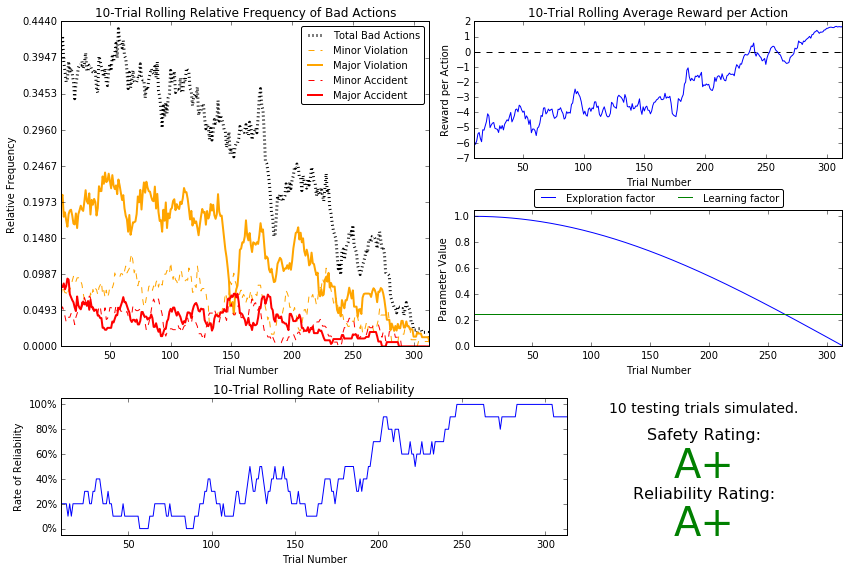

In [19]:
# Load the 'sim_improved-learning' file from the improved Q-Learning simulation
vs.plot_trials('sim_improved-learning.csv')

### Question 7
Using the visualization above that was produced from your improved Q-Learning simulation, provide a final analysis and make observations about the improved driving agent like in **Question 6**. Questions you should answer:  
- *What decaying function was used for epsilon (the exploration factor)?*
- *Approximately how many training trials were needed for your agent before begining testing?*
- *What epsilon-tolerance and alpha (learning rate) did you use? Why did you use them?*
- *How much improvement was made with this Q-Learner when compared to the default Q-Learner from the previous section?*
- *Would you say that the Q-Learner results show that your driving agent successfully learned an appropriate policy?*
- *Are you satisfied with the safety and reliability ratings of the *Smartcab*?*

**Answer:**

- I used $\epsilon = cos(at), for  0<a<1, $ a=0.005 as my decaying function with an epsilon-tolerance of [0.01, 1.0] and a learning rate alpha of 0.25. 

- 313 training trials were needed before the agent began testing.

- I used an epsilon-tolerance of [0.01, 1.0] and an alpha of 0.25. A low value of alpha was used to force the agent to pay a greater emphasis on its collective knowledge gained (or cumulative Q-values) instead of favoring the most recent trial. This will cause the Q-value to grow more incrementally while also help the learning process reach a greater level of reliability with fewer drastic performance spikes. I used an epsilon-tolerance interval of [0.01, 1.0] to increase the level of random exploration by the agent, and also to increase the number of training trials (about 3 times the size of state combinations). In addition, by altering the epsilon function itself, the training period was further stretched.

- The level of improvement between this Q-Learner and the default Q-Learner can be described as "day and night". There was a vast improvement across the board resulting in **A+** ratings for both *safety* and *reliability*. It is safe to say the agent was able to learn a proper policy. By only participating in 20 training intervals, the default Q-Learner was unable to amass a full Q-table with entries for every state combination, let alone update and refine existing Q-values for each state-action combination on subsequent trials.

### Define an Optimal Policy

Sometimes, the answer to the important question *"what am I trying to get my agent to learn?"* only has a theoretical answer and cannot be concretely described. Here, however, you can concretely define what it is the agent is trying to learn, and that is the U.S. right-of-way traffic laws. Since these laws are known information, you can further define, for each state the *Smartcab* is occupying, the optimal action for the driving agent based on these laws. In that case, we call the set of optimal state-action pairs an **optimal policy**. Hence, unlike some theoretical answers, it is clear whether the agent is acting "incorrectly" not only by the reward (penalty) it receives, but also by pure observation. If the agent drives through a red light, we both see it receive a negative reward but also know that it is not the correct behavior. This can be used to your advantage for verifying whether the **policy** your driving agent has learned is the correct one, or if it is a **suboptimal policy**.

### Question 8
Provide a few examples (using the states you've defined) of what an optimal policy for this problem would look like. Afterwards, investigate the `'sim_improved-learning.txt'` text file to see the results of your improved Q-Learning algorithm. _For each state that has been recorded from the simulation, is the **policy** (the action with the highest value) correct for the given state? Are there any states where the policy is different than what would be expected from an optimal policy?_ Provide an example of a state and all state-action rewards recorded, and explain why it is the correct policy.

**Answer:** 
The state I chose was 'waypoint', 'light color', 'oncoming (car)', 'left (car)'. To define an optimal policy, lets take a look at a few state-action pair and break down the appropriate actions in each scenario.

### 1: **(waypoint:'right', light:'red', oncoming:'left', left car:None)**

The light is red and I want to turn right. A vast majority of US city/state traffic laws allow vehicles to make a right turn at a red light unless otherwise posted. This right turn must be under the drivers' discretion as they do not have the right-of-way to oncoming traffic. There is no car in the lane to my left to consider, so assuming the traffic laws apply in this situation, I should turn right if the coast is clear. 

Results:
** -- forward : -17.57
 -- right : 2.28
 -- None : 1.56
 -- left : -9.53**
 
As predicted, the highest Q-value for this state is to turn 'right'. Proceeding forward or turning left will result in significant penalties, and staying idle will result in a positive reward, albeit less than the reward of a right turn. This action follows an optimal policy.
 
### 2: **(waypoint:'left', light:'red', oncoming:'forward', left car:None)**

The light is red and I want to turn left. Unlike the previous state where I wanted to turn right at a red light, traffic laws do not permit me to make a left turn at a red light. Thus, I do not have priority to oncoming traffic. I do not have a car on my left to consider, so I should idle and wait for a green light in order to safely avoid an accident or violation.
 
Results:
**-- forward : -10.22
 -- right : 0.28
 -- None : 2.16
 -- left : -10.01**
 
The highest Q-value for this state is for 'None', or idle. Proceeding forward or turning left will both result in significant penalties (and could cause some major damage!). Because laws allow it, I should not be penalized for making a right turn if I choose to do so, but the reward for turning right is lesser than that of idling. This action follows an optimal policy.
 
 ### 3: (waypoint:'right', light:'green', oncoming:'right', left car:'right')

The light is green and I want to turn right. I have the right-of-way to oncoming and left traffic, so I should confidently turn right. The car on my left intends to turn right as well, so I should feel safe continuing with a right turn.
 
Results:
**-- forward : 0.00
 -- right : 0.47
 -- None : 0.00
 -- left : -4.81**
 
The highest Q-value for this state is to turn 'right'. Because the car on my left-hand side also intends to turn right, if I choose to turn left, I could very likely cause an accident. As expected, the 'left' action results in the greatest penalty (or lowest Q-value). 

_**Revised**_:
Because I have a green-light, choosing 'None', or idling, should also result in a penalty (and probably some angry drivers behind me!). Because **'forward'** and **'None'** have Q-scores of *0.00*, I suspect our agent needs to go through additional training trials so it can reach this state again and correct the reward and penalty values. Because we are only concerned with the action with the highest Q-value, this action still follows an optimal policy.
 
 ### 4: (waypoint:'left', light:'green', oncoming:'left', left car:'right')

The light is green and I want to turn left. Assuming I do not have to yield to oncoming traffic (green left-turn arrow), I have the priority to safely make left-hand turn.
 
Results:
** -- forward : 0.47
 -- right : 0.19
 -- None : 0.65
 -- left : 2.27**

_**Revised**_:
As expected, the highest Q-value for this state is to turn 'left'. The car on my left-hand side wants to turn right, but I have the priority in my lane, so that car must yield to my move, so I should not be penalized for deciding to move forward or turning right. Oddly, choosing an action of 'None' results in a positive reward, but since we are concerned with the highest Q-value, this action follows an optimal policy.


### _**Revised: Sub-Optimal**_: ###
### 5: (waypoint:'forward', light:'green', oncoming:'right', left car:'forward')
 
The light is green and I want to drive forward. The oncoming traffic is turning right, so they should not interfere with me. The car on my left intends to go forward, but because I have the green light, they must yield to me. An optimal policy should be driving forward.
 
 Results:
**-- forward : 0.00
 -- right : 1.23
 -- None : -2.95
 -- left : -9.06**
 
This is an example of a sub-optimal policy because the action with the highest Q-value is 'right' and driving 'forward' is 0.00. As stated by the parameters in 'Environment.py', I should be rewarded for driving forward with a 'green' light, and should be punished for driving forward at a 'red' light. Turning right here will not result in a penalty, but it most definitely was a sub-optimal action given the state parameters.

If the action above is still not considered "sub-optimal", then I can conclude that all policies are optimal. Of the obvious suboptimal situations, there were not any cases where the agent ran a red light except for turning right. Also, there were not any instances where the agent turned left while oncoming traffic was going 'forward' or 'right'.

-----
### Optional: Future Rewards - Discount Factor, `'gamma'`
Curiously, as part of the Q-Learning algorithm, you were asked to **not** use the discount factor, `'gamma'` in the implementation. Including future rewards in the algorithm is used to aid in propogating positive rewards backwards from a future state to the current state. Essentially, if the driving agent is given the option to make several actions to arrive at different states, including future rewards will bias the agent towards states that could provide even more rewards. An example of this would be the driving agent moving towards a goal: With all actions and rewards equal, moving towards the goal would theoretically yield better rewards if there is an additional reward for reaching the goal. However, even though in this project, the driving agent is trying to reach a destination in the allotted time, including future rewards will not benefit the agent. In fact, if the agent were given many trials to learn, it could negatively affect Q-values!

### Optional Question 9
*There are two characteristics about the project that invalidate the use of future rewards in the Q-Learning algorithm. One characteristic has to do with the *Smartcab* itself, and the other has to do with the environment. Can you figure out what they are and why future rewards won't work for this project?*

**Answer:**
We are working with an egocentric Smartcab that only has the ability to see its immediate surrounding environment. It has no knowledge of future states or conditions, thus lacking the ability to consider long-term rewards. 

Relating this to the real-world, a similar scenario would be like driving with the assistance of a GPS app, such as Waze. Imagine you are driving on the freeway headed home from work and you come upon dense traffic. Waze is able to provide you real-time information such as the traffic conditions ahead of you as well as other routes you can take that may get you home sooner. If you know that the traffic only gets more dense up ahead, you may choose to take an alternative route through a residential neighborhood. Initially, you may exit the freeway and sit at a stop-light. When you come to the stop light, you realize you were traveling faster on the freeway (greater reward) compared to your current idle state (less reward). But because you trust Waze, you understand that sacrificing the immediate reward of forward travel (had you stayed on the freeway), you will ultimately be rewarded in the long-term by arriving home sooner! 

Our Smartcab, however, functions without the assistance of Waze, and would not choose to take an immediate penalty, even if it meant a greater reward by the time it reached its destination. Because it is only able to focus on its immediate surroundings and will make the moves which only provide it the greatest level of immediate gratification (or reward).

Because this project is only focused on immediate rewards, and also because the environment only provides traffic conditions at our current state, a discount factor gamma would not be valid because it only manages the impact of long-term rewards.

**Revised:**
We are working with an egocentric Smartcab that only has the ability to see its immediate surrounding environment. In any given state, the environment provides traffic conditions and signal color. It would not be possible to propagate rewards to states that are "close to the destination" because the agent is not rewarded for reaching its target destination, nor is it rewarded for getting closer to its target destination. The agent receives rewards for obeying traffic laws and choosing its next action, and is designed to choose the action that will result in the maximum reward in its current state. It does not have knowledge of future states, preventing it from planning for future rewards. States are random in nature, so any given intersection will not always have the same signals or traffic conditions.

If we were to assume that states are linked to specific intersections, and we tried to propagate rewards away from the target destination, after a while we would begin propagating rewards away from all of the intersections. The destination varies from trial to trial, so propagating rewards in a single trial may negatively impact the Q-values for future trials.

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.